## matplotlib
- 책 117p부터 138p까지의 코드다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales.head(3)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3


In [ ]:
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB
None


In [ ]:
import numpy as np 

sales['year'] = sales['datesold'].dt.year
result = np.round(sales.groupby('year')['price'].agg(np.mean), 1)
pd.DataFrame(result.head()).T

year,2007,2008,2009,2010,2011
price,522377.2,493814.2,496092.0,559564.8,566715.1


## 선 그래프

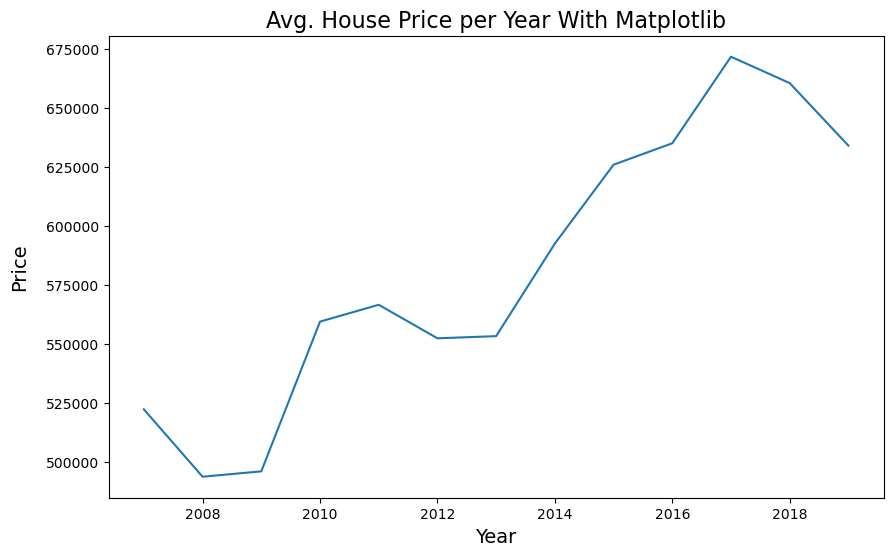

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(result.index, result.values)
ax.set_title('Avg. House Price per Year With Matplotlib', size = 16)
ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Price', size = 14, labelpad=12)
plt.savefig('output/matplotlib01.png', dpi=200)
plt.show()

## 막대 그래프

In [ ]:
import numpy as np 
import seaborn as sns

sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 2007, 2008 추출
df = sales.copy()
df = df[df['year'].isin([2007, 2008])]
result = np.round(df.groupby(['year', 'month'])['price'].agg(np.mean), 1)
result.reset_index().iloc[::3, :]

,year,month,price
0,2007,2,407500.0
3,2007,5,339500.0
6,2007,8,505608.7
9,2007,11,505442.3
12,2008,2,531080.0
15,2008,5,522394.7
18,2008,8,449510.4
21,2008,11,489546.3


In [ ]:
result = result.reset_index()
result['year'].unique()

array([2007, 2008], dtype=int64)

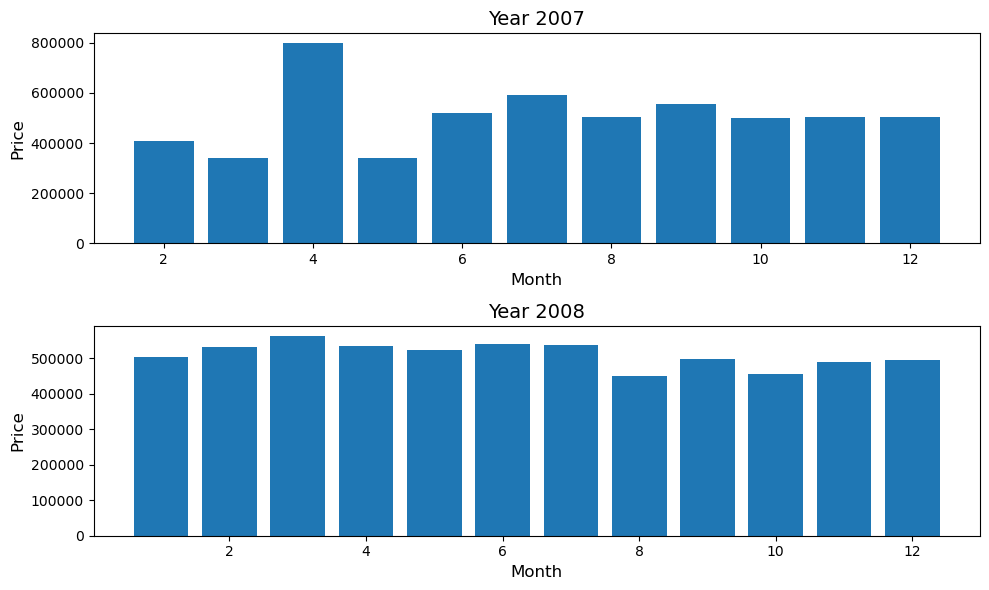

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
for i, y in enumerate(result['year'].unique()):
    year_data = result[result['year'] == y]
    ax[i].bar(year_data['month'], year_data['price'])
    ax[i].set_title('Year {}'.format(y), fontsize=14)
    ax[i].set_xlabel('Month', fontsize=12)
    ax[i].set_ylabel('Price', fontsize=12)
plt.tight_layout()
plt.savefig('output/matplotlib02.png', dpi=200)
plt.show()

## 박스플롯

In [ ]:
sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales = sales.loc[sales['price'] < 1000000].reset_index(drop=True)

sales.head(3)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3


In [ ]:
sales['propertyType'].unique()

array(['house', 'unit'], dtype=object)

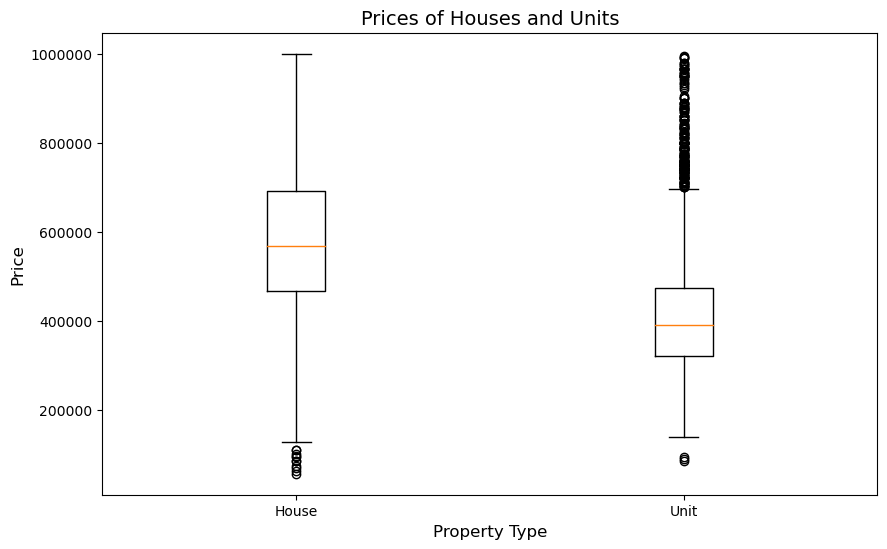

In [ ]:
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

house_df = sales[sales['propertyType'] == 'house']['price']
unit_df = sales[sales['propertyType'] == 'unit']['price']

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([house_df, unit_df])
ax.set_xticklabels(['House', 'Unit'])
ax.set_xlabel('Property Type', fontsize=12)
ax.set_ylabel('Price', fontsize=12)
ax.set_title('Prices of Houses and Units', fontsize=14)
ax.yaxis.set_major_formatter(formatter)

plt.savefig('output/matplotlib03.png', dpi=200)
plt.show()

# Seaborn

In [ ]:
import numpy as np 
import seaborn as sns
import pandas as pd

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 2007, 2008 추출
df = sales.copy()
df = df[df['year'].isin([2008, 2018])]
result = np.round(df.groupby(['year', 'month'])['price'].agg(np.mean), 1).reset_index()
result.head(12)

,year,month,price
0,2008,1,504428.6
1,2008,2,531080.0
2,2008,3,563500.0
3,2008,4,534204.5
4,2008,5,522394.7
5,2008,6,539092.6
6,2008,7,537453.1
7,2008,8,449510.4
8,2008,9,496778.7
9,2008,10,454822.0


In [ ]:
result.tail(12)

,year,month,price
12,2018,1,590753.8
13,2018,2,666738.3
14,2018,3,717516.1
15,2018,4,665040.4
16,2018,5,669840.6
17,2018,6,660528.7
18,2018,7,628074.0
19,2018,8,629684.1
20,2018,9,658647.4
21,2018,10,655744.7


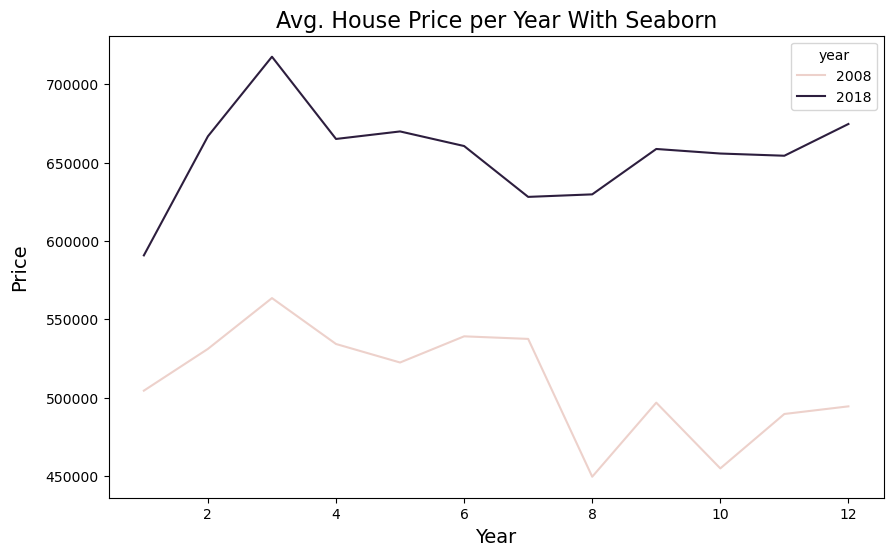

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=result, x=result.month, y=result.price, hue=result.year, ax=ax)
ax.set_title('Avg. House Price per Year With Seaborn', size = 16)
ax.set_xlabel('Year', size = 14)
ax.set_ylabel('Price', size = 14, labelpad=12)
ax.yaxis.set_major_formatter(formatter)

plt.savefig('output/seaborn01.png', dpi=200)
plt.show()

In [ ]:
import seaborn as sns 

# 데이터 가져오기
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


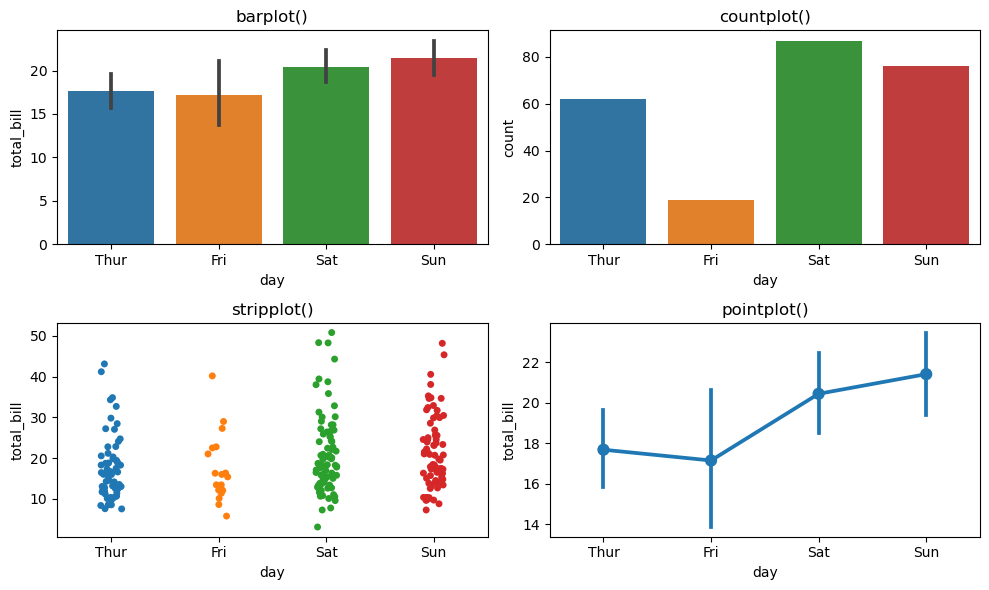

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 6))

sns.barplot(x="day", y="total_bill", data=tips, ax = ax[0, 0])
ax[0, 0].set_title('barplot()')

sns.countplot(x="day", data=tips, ax = ax[0, 1])
ax[0, 1].set_title('countplot()')

sns.stripplot(x="day", y="total_bill", data=tips, ax = ax[1, 0])
ax[1, 0].set_title('stripplot()')

sns.pointplot(x="day", y="total_bill", data=tips, ax = ax[1, 1])
ax[1, 1].set_title('pointplot()')

plt.tight_layout()
plt.savefig('output/seaborn02.png', dpi=200)
plt.show()

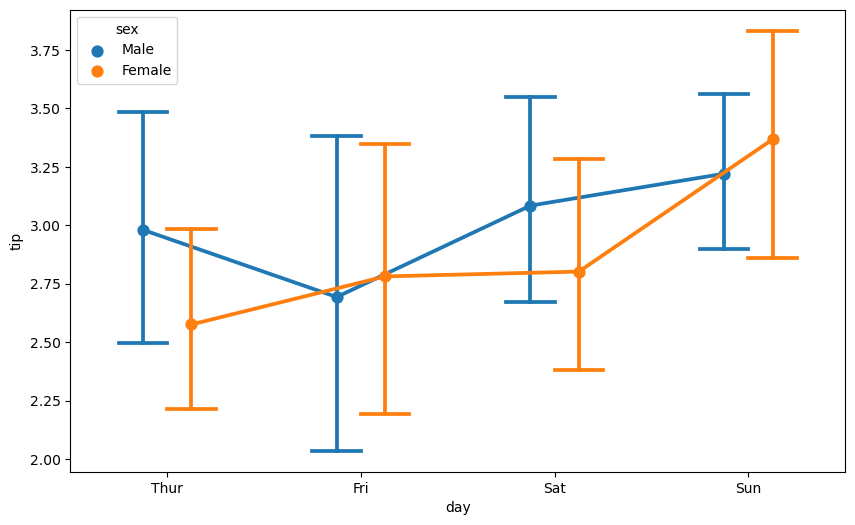

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(data=tips, x='day', y='tip', hue='sex', 
              dodge=0.25, capsize=0.25, errorbar='sd', ax = ax)
plt.savefig('output/seaborn03.png', dpi=200)
plt.show()

- 적용

In [ ]:
import numpy as np 
import seaborn as sns
import pandas as pd

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 2007 ~ 2010추출
df = sales.copy()
df = df[df['year'].isin([2007, 2008, 2009, 2010])]
df.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
1,2007-02-27,2906,290000,house,3,2007,2
2,2007-03-07,2905,328000,house,3,2007,3
3,2007-03-09,2905,380000,house,4,2007,3
4,2007-03-21,2906,310000,house,3,2007,3


In [ ]:
df['year'].unique()

array([2007, 2008, 2009, 2010], dtype=int64)

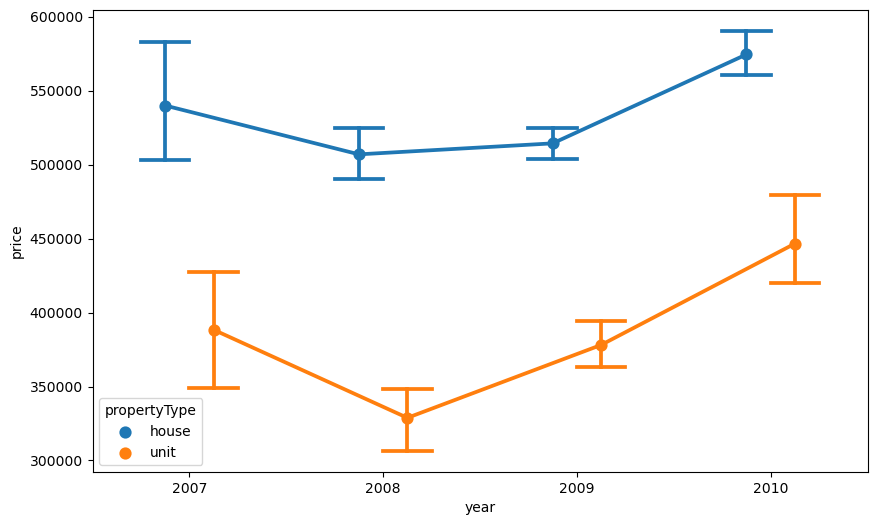

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.pointplot(data=df, x='year', y='price', hue='propertyType', 
              dodge=0.25, capsize=0.25, errorbar='sd', ax = ax)
plt.savefig('output/seaborn04.png', dpi=200)
plt.show()

## Boxplot

[-1000000.        0.  1000000.  2000000.  3000000.  4000000.  5000000.
  6000000.  7000000.  8000000.]


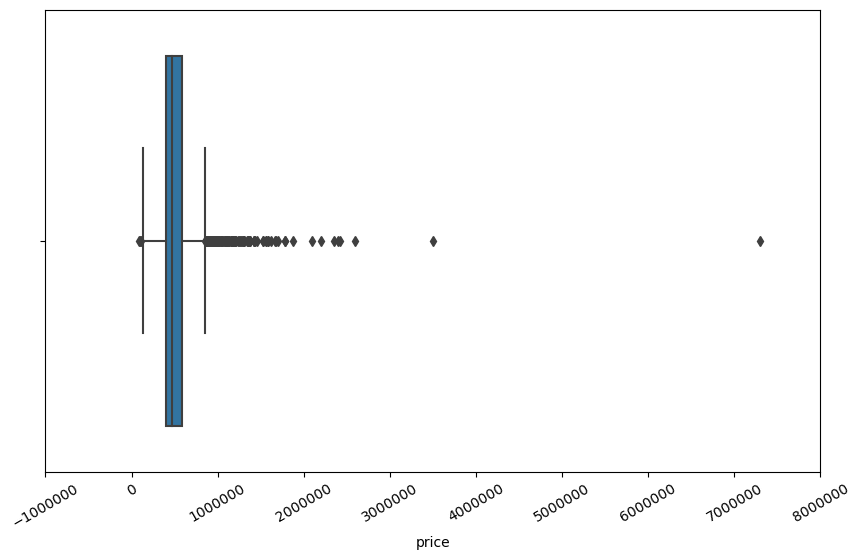

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
formatter = ScalarFormatter()
formatter.set_scientific(False)

sales = pd.read_csv('data/raw_sales.csv', parse_dates=['datesold'])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month

# 2007 ~ 2010추출
df = sales.copy()
df = df[df['year'].isin([2007, 2008, 2009, 2010])]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df["price"], ax = ax)
ax.set_xticks(ax.get_xticks())
print(ax.get_xticks())
ax.set_xticklabels(ax.get_xticks(), rotation=30)
ax.xaxis.set_major_formatter(formatter)
plt.savefig('output/seaborn05.png', dpi=200)
plt.show()

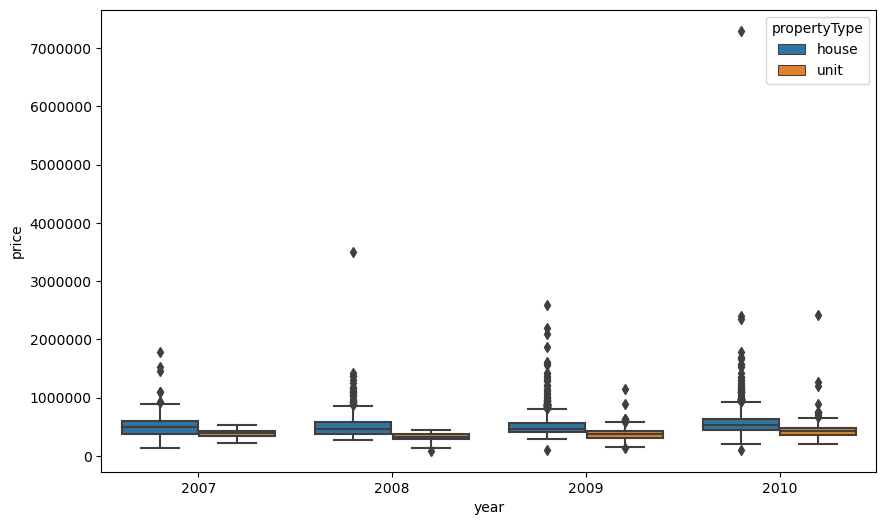

In [ ]:
# 2007 ~ 2010추출
df = sales.copy()
df = df[df['year'].isin([2007, 2008, 2009, 2010])]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = df, x = 'year', y = 'price', hue = 'propertyType', ax = ax)
ax.yaxis.set_major_formatter(formatter)
plt.savefig('output/seaborn06.png', dpi=200)
plt.show()

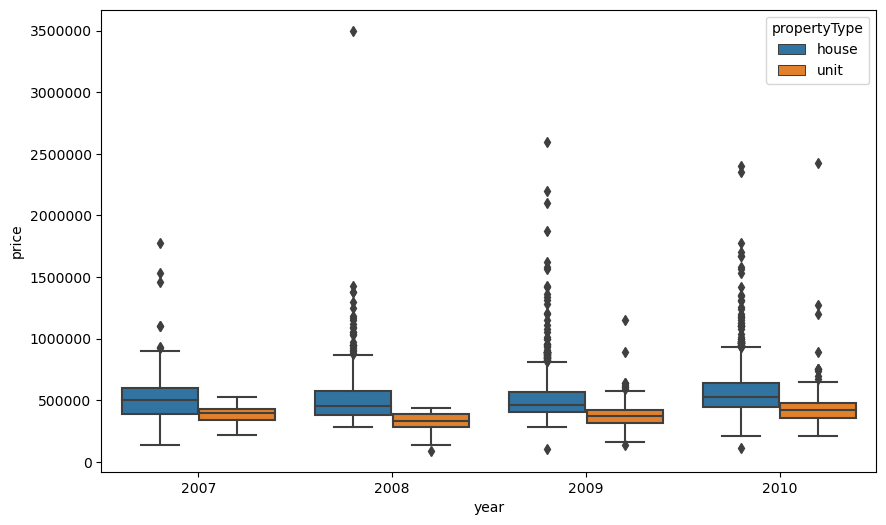

In [ ]:
# 2007 ~ 2010추출
df2 = df[df['price'] <= 7000000]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data = df2, x = 'year', y = 'price', hue = 'propertyType', ax = ax)
ax.yaxis.set_major_formatter(formatter)
plt.savefig('output/seaborn07.png', dpi=200)
plt.show()